# Diamond Price Prediction




## Overview




In this Notebook we will create a model to predict Diamonds price, we will follow on steps to create an efficient with less percentage error in prediction values.

Here are the main steps we will go through:
1. Get the data.
2. Discover and visualize the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.
5. Fine-tune model.
6. Present solution.





### Import all needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from numpy.ma.core import sqrt
import numpy as np
from sklearn.preprocessing import StandardScaler
from random import randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV , cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier  
from numpy.polynomial.polynomial import polyfit



<a></a>
## 1. Get the Data

In [2]:
train='https://drive.google.com/file/d/17YpBEatO8MiRX8kAltyIHAbppOImWhNg/view?usp=sharing'
test='https://drive.google.com/file/d/1dX3Bg0vISU3p6MfmPIbW6mVcfYKN4nUt/view?usp=sharing'
data_train_path = 'https://drive.google.com/uc?id=' + train.split('/')[-2]
data_test_path = 'https://drive.google.com/uc?id=' + test.split('/')[-2]

In [3]:
data_train_df = pd.read_csv(data_train_path)
data_test_df = pd.read_csv(data_test_path)

## 2- Discover and visualize the data
### A- Data discovery
Check the head of Diamond's data, and check out its info() and describe() methods.

In [4]:
print(f"The training set shape is {data_train_df.shape}, {data_train_df.shape[0]} rows and {data_train_df.shape[1]} columns(features).")
print(f"The testing set shape is {data_test_df.shape}, {data_test_df.shape[0]} rows and {data_test_df.shape[1]} columns(features).")

The training set shape is (43152, 11), 43152 rows and 11 columns(features).
The testing set shape is (10788, 10), 10788 rows and 10 columns(features).


In [5]:
data_train_df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

**Note**
*.columns attribute to return the column labels of the given Dataframe ( data_train_df)*

In [6]:
data_train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
data_test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


**Note** *head()function method returns the first 5 rows if a number is not specified.*

In [8]:
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


**Notes** 

* .info()method prints information about the DataFrame.*

* The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values) 

* in data_train_df we have 3 columns contain object data type (Text or mixed numeric and non-numeric values)

In [9]:
(data_train_df == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [10]:
data_train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
data_train_df[data_train_df.duplicated()]

,Id,carat,cut,color,clarity,depth,table,price,x,y,z


**Note** *there is no duplicated records*

In [12]:
data_train_df.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

**Note** *there is no fearures causes Zero-varinace*

In [13]:
is_col_categorical = (data_train_df.dtypes =="object")
all_categorical_cols = list(is_col_categorical[is_col_categorical].index)
all_categorical_cols

['cut', 'color', 'clarity']

In [14]:
data_train_df['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

**Note**


*    value_counts() function return a Series containing counts of unique values. 
*    The resulting object will be in descending order so that the first element is the most frequently-occurring element (here Ideal is the most frequently). 
*    Excludes NA values by default
*    there are 5 options for cut value (Ideal, Premium, Very Good, Good and Fair)



In [15]:
data_train_df['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

**Note**
there are multiple values for color value (G, E, F, H, D, I, J)

In [16]:
data_train_df['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

**Note** *there are multiple values for clarity value (SI1, VS2, SI2, VS1, VVS2, VVS1, IF and I1)*

In [17]:
data_train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Note** 
*   describe() method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
*   for example the minimum depth value is 43.000000	and the maximum price is 18823.000000

### B- Data visualization

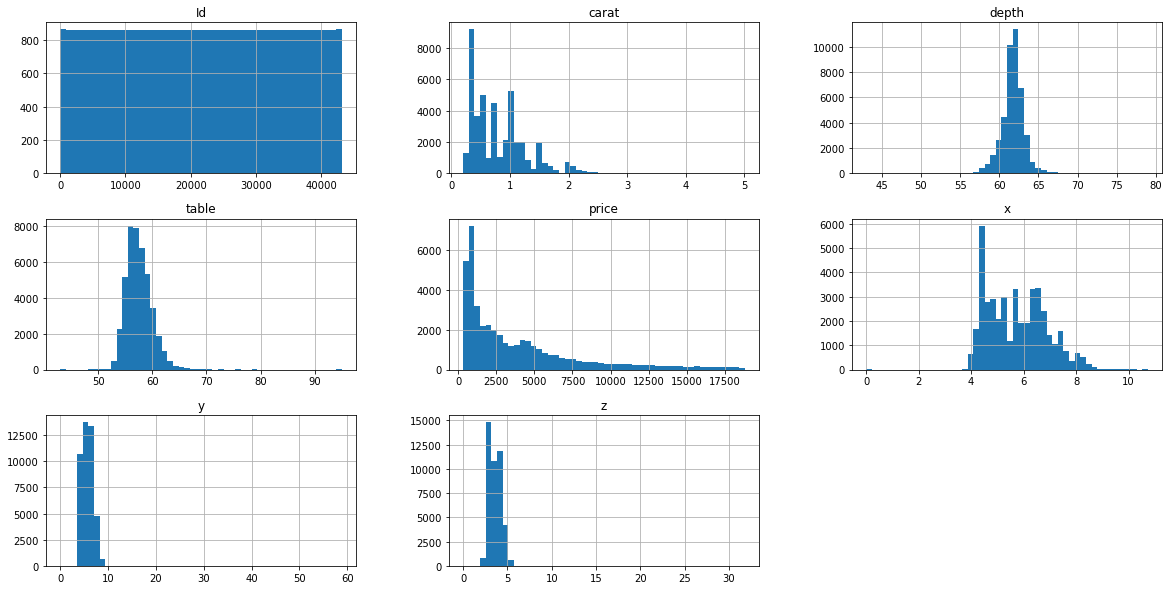

In [18]:
data_train_df.hist(bins=50, figsize=(20,10))
plt.show()

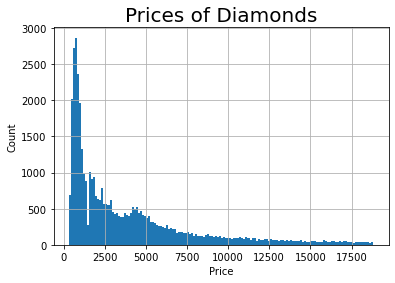

In [19]:
plt.hist(data_train_df["price"], bins = 150)
plt.title("Prices of Diamonds", fontdict={'fontsize': 20})
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Insigth from figure :**
*   price have range nearly between 300 and 1900
*   most of Diamond's price less than 2500
*   a low number of Diamond have price greater than 7500

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

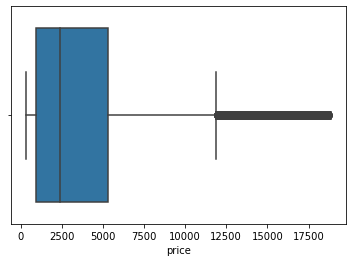

In [20]:
sns.boxplot(data_train_df['price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

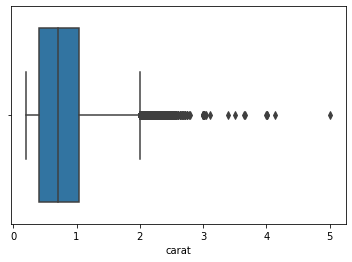

In [21]:
sns.boxplot(data_train_df['carat'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

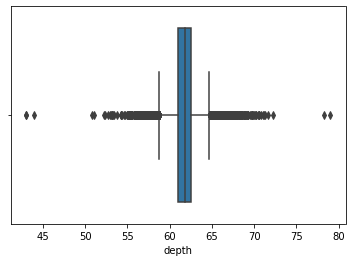

In [22]:
sns.boxplot(data_train_df['depth'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

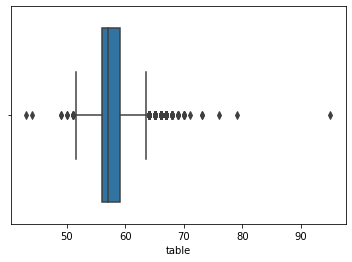

In [23]:
sns.boxplot(data_train_df['table'])

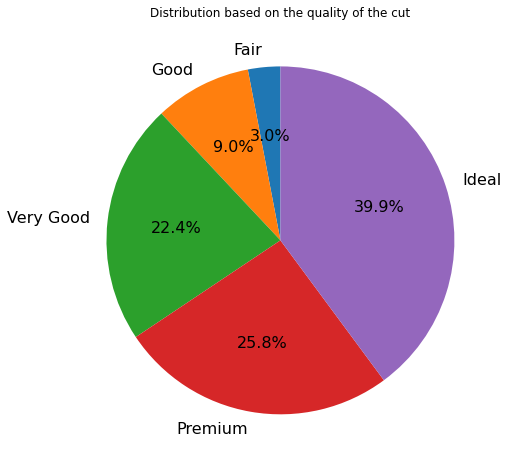

In [24]:
explode = (0, 0, 0.1, 0, 0)  
groupdata = data_train_df.groupby("cut").count()
x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.figure(figsize = [8,8])
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

plt.title("Distribution based on the quality of the cut")
plt.show()

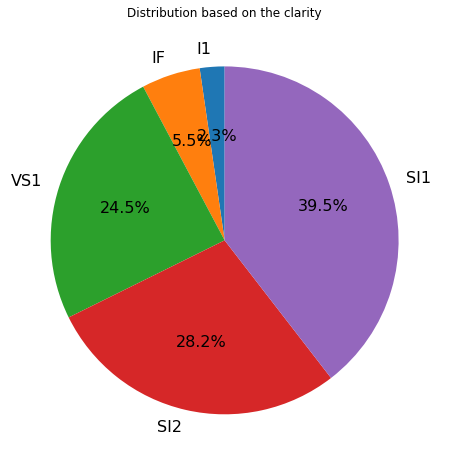

In [25]:
groupdata = data_train_df.groupby("clarity").count()
x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.figure(figsize = [8,8])
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

plt.title("Distribution based on the clarity")
plt.show()

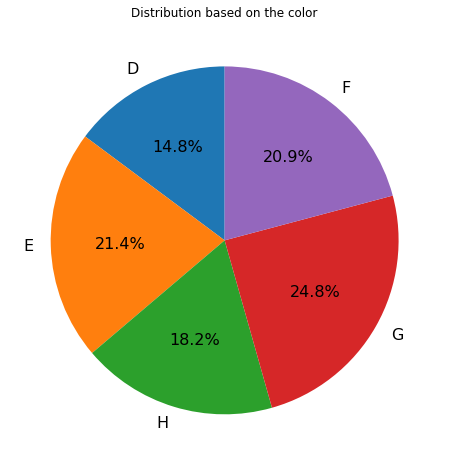

In [26]:
groupdata = data_train_df.groupby("color").count()
x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.figure(figsize = [8,8])
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

plt.title("Distribution based on the color")
plt.show()

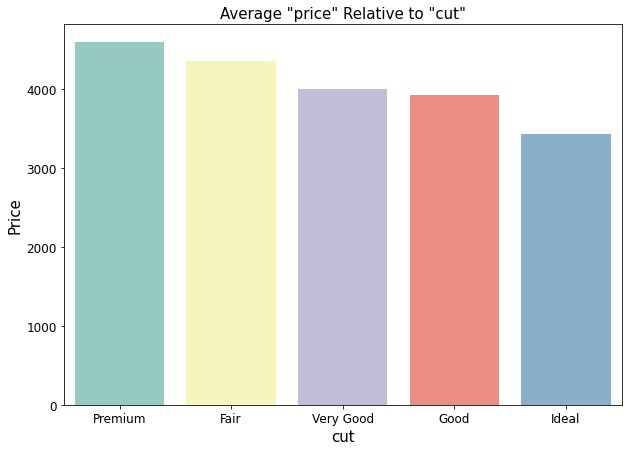

In [27]:
plt.figure(figsize=(10,7))
mean_price_by_cut = data_train_df[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)
sns.barplot(x = mean_price_by_cut['cut'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price', style = 'normal', size = 15)
plt.xlabel('cut', style = 'normal', size = 15)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "cut"',color = 'black',fontsize=15)
plt.show()

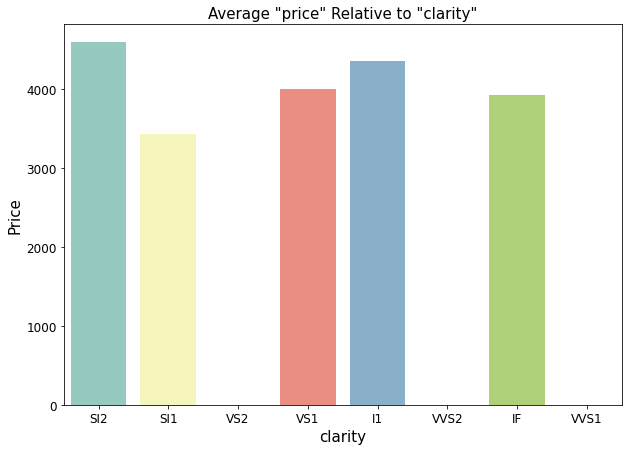

In [28]:
plt.figure(figsize=(10,7))
mean_price_by_clarity = data_train_df[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)
sns.barplot(x = mean_price_by_clarity['clarity'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price', style = 'normal', size = 15)
plt.xlabel('clarity', style = 'normal', size = 15)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "clarity"',color = 'black',fontsize=15)
plt.show()

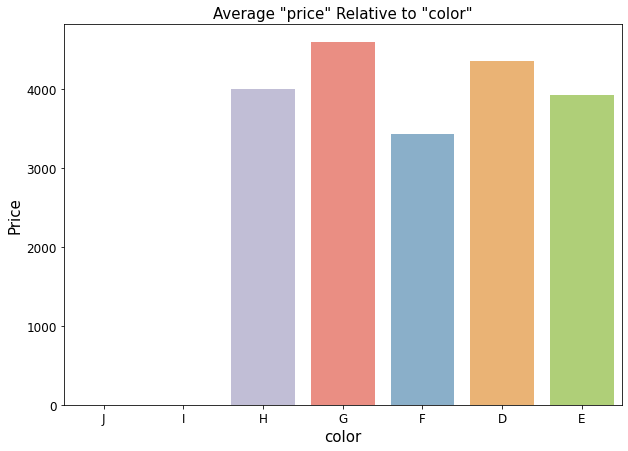

In [29]:
plt.figure(figsize=(10,7))
mean_price_by_color = data_train_df[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)
sns.barplot(x = mean_price_by_color['color'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price', style = 'normal', size = 15)
plt.xlabel('color', style = 'normal', size = 15)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "color"',color = 'black',fontsize=15)
plt.show()

In [30]:
data_train_df.corr()

,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


**Note** 
* .corr() method is used to find the pairwise correlation of all columns in the dataframe. 
* Any na values are automatically excluded. 
* For any non-numeric data type columns in the dataframe it is ignored.
* note that have a high corrleatiom between carat with price, width, heigth and depth

[Text(0.5, 1.0, 'Correlation Between Features')]

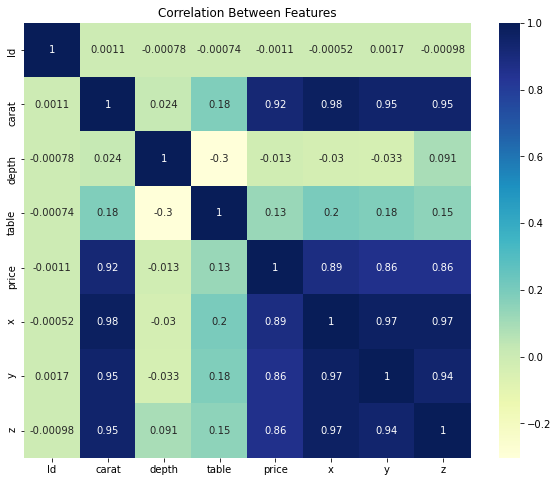

In [31]:
sns.heatmap
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data_train_df.corr(), annot=True, cmap="YlGnBu",ax=ax).set(title='Correlation Between Features')

<AxesSubplot:xlabel='price', ylabel='table'>

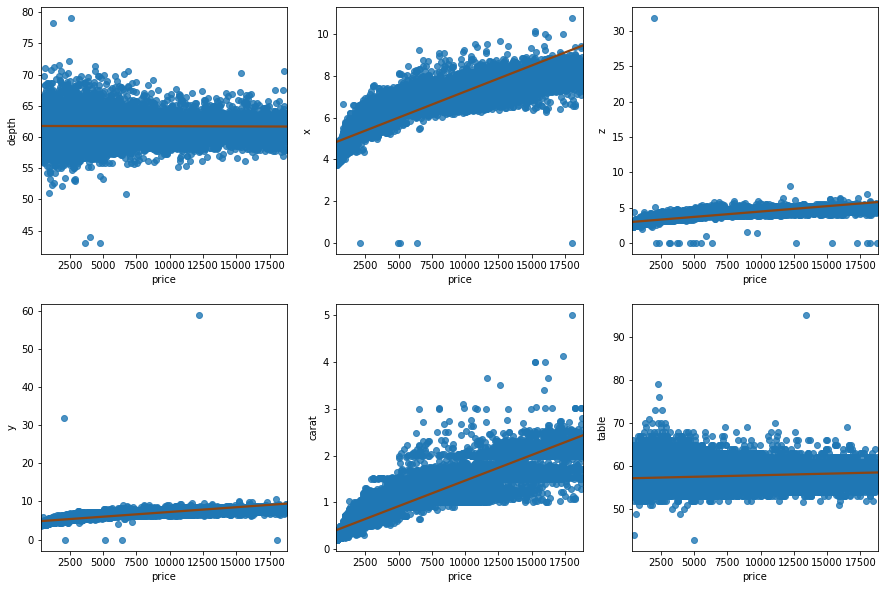

In [32]:

f, ax = plt.subplots(2,3, figsize = (15,10))
sns.regplot(x="price", y="depth", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[0,0])
sns.regplot(x="price", y="x", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[0,1])
sns.regplot(x="price", y="z", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[0,2])
sns.regplot(x="price", y="y", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[1,0])
sns.regplot(x="price", y="carat", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[1,1])
sns.regplot(x="price", y="table", data=data_train_df, line_kws={"color": "#8B4513"},ax = ax[1,2])




<AxesSubplot:xlabel='carat', ylabel='price'>

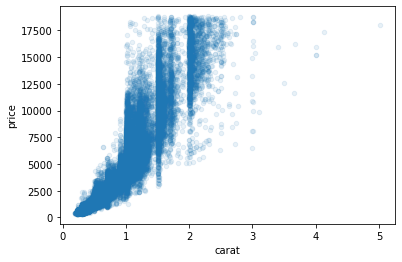

In [33]:
data_train_df.plot(kind="scatter", x="carat", y="price", alpha = 0.1)

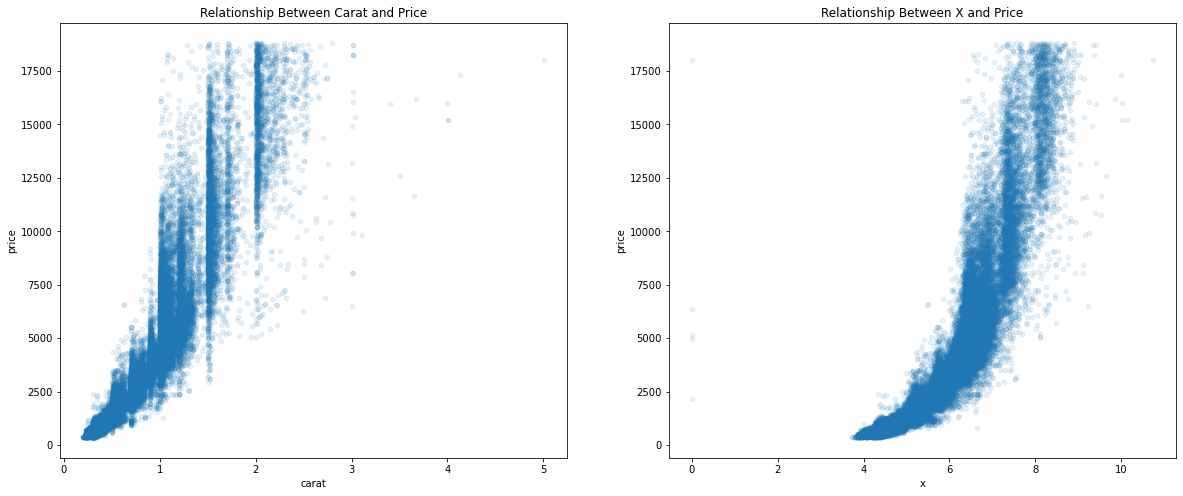

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
data_train_df.plot(kind="scatter", x="carat", y="price",
 alpha=0.1, ax=ax1)
data_train_df.plot(kind="scatter", x="x", y="price",
 alpha=0.1, ax=ax2)
ax1.title.set_text('Relationship Between Carat and Price')
ax2.title.set_text('Relationship Between X and Price')
plt.show()

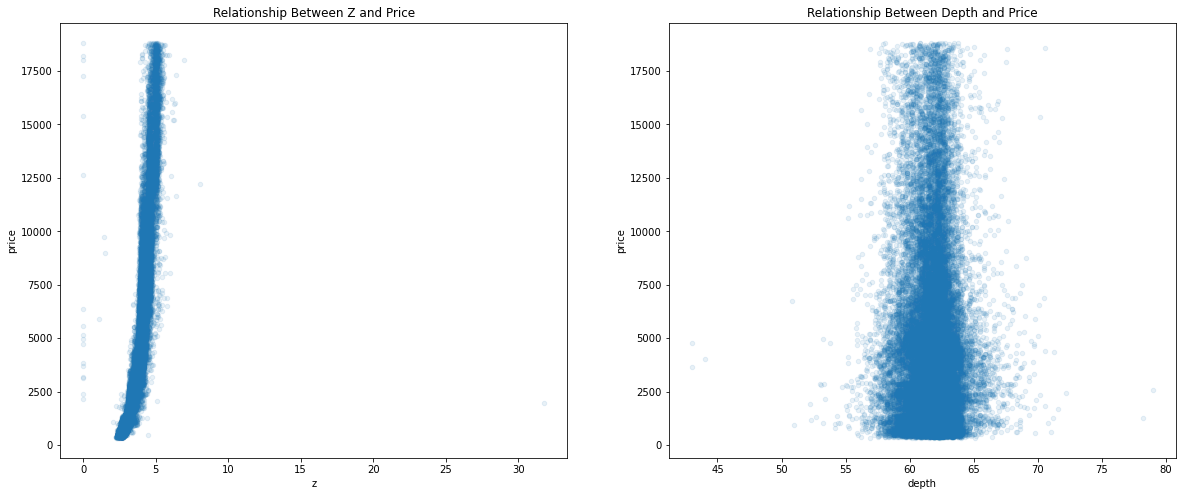

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
data_train_df.plot(kind="scatter", x="z", y="price",
 alpha=0.1, ax=ax1)
data_train_df.plot(kind="scatter", x="depth", y="price",
 alpha=0.1, ax=ax2)
ax1.title.set_text('Relationship Between Z and Price')
ax2.title.set_text('Relationship Between Depth and Price')
plt.show()

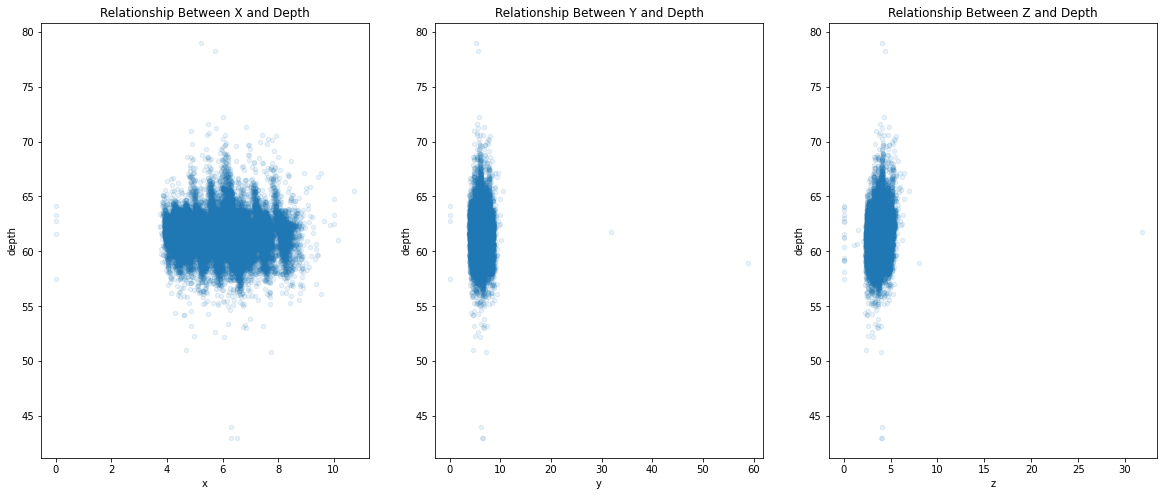

In [36]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
data_train_df.plot(kind="scatter", x="x", y="depth",
 alpha=0.1, ax=ax1)
data_train_df.plot(kind="scatter", x="y", y="depth",
 alpha=0.1, ax=ax2)
data_train_df.plot(kind="scatter", x="z", y="depth",
 alpha=0.1, ax=ax3)
ax1.title.set_text('Relationship Between X and Depth')
ax2.title.set_text('Relationship Between Y and Depth')
ax3.title.set_text('Relationship Between Z and Depth')

plt.show()

In [37]:
attributes = ['x', 'y', 'z', 'price','cut']


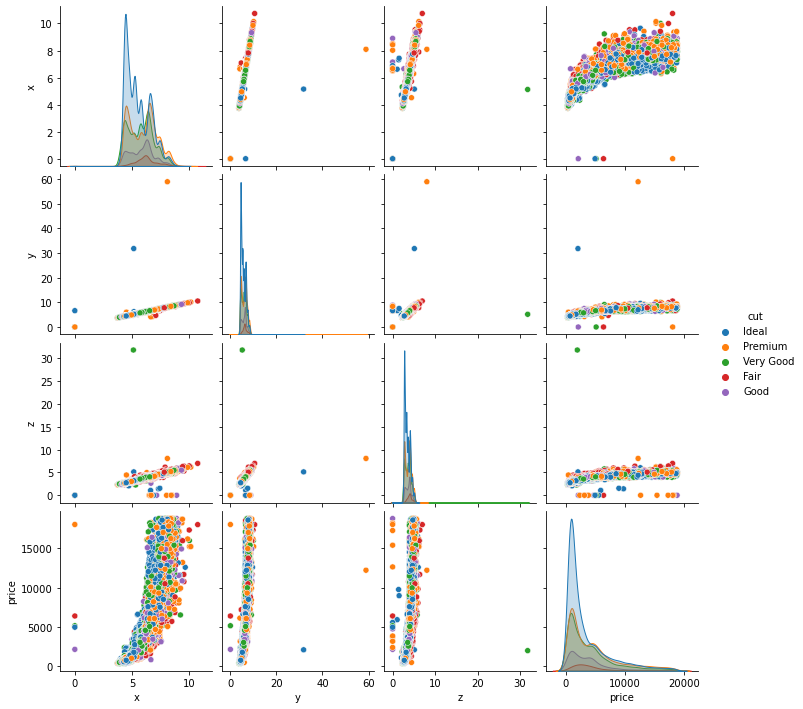

In [38]:
sns.pairplot(data_train_df[attributes],hue="cut") 

In [39]:
data_train_df['price/carat'] = data_train_df['price']/data_train_df['carat']

In [40]:
data_train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,4028.301887
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,10042.384106
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,2587.500000
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,2975.471698
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,3708.571429


Text(0.5, 1.0, 'price distribution range of different cut level')

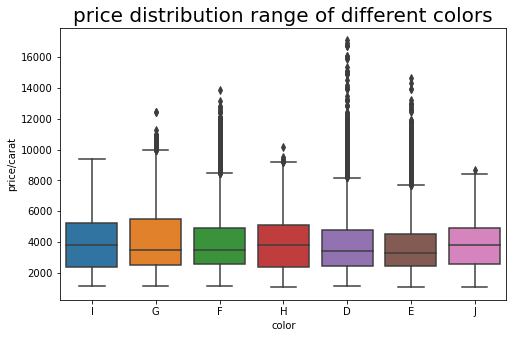

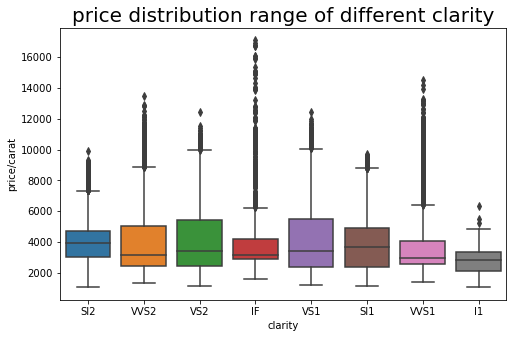

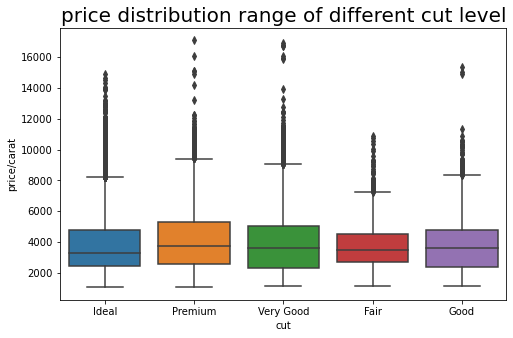

In [41]:
plt.subplots(figsize = (8,5))
sns.boxplot(x='color',y='price/carat',data=data_train_df)
plt.title('price distribution range of different colors', fontsize=20)

plt.subplots(figsize = (8,5))
sns.boxplot(x='clarity',y='price/carat',data=data_train_df)
plt.title('price distribution range of different clarity', fontsize=20)

plt.subplots(figsize = (8,5))
sns.boxplot(x='cut',y='price/carat',data=data_train_df)
plt.title('price distribution range of different cut level', fontsize=20)

In [42]:
data_train_df= data_train_df.drop("price/carat", axis=1)

In [43]:
corr_matrix = data_train_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

## 3- Prepare the data
### A- Data Cleaning

 
 

In [44]:
data_train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Note** no null value in *data*

In [45]:
(data_train_df == 0).sum(axis=0)


Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

### B-Encoding Categorical data

In [46]:
clarity = {'I1':7,'SI2':6,'SI1':5, 'VS2':4, 'VS1':3, 'VVS2':2, 'VVS1':1, 'IF':0}

In [47]:
color = {'J':6,'I':5,'H':4, 'G':3, 'F':2, 'E':1, 'D':0}

In [48]:
cut = {'Fair':4,'Good':3,'Very Good':2, 'Premium':1, 'Ideal':0}

In [49]:
data_train_df.clarity.replace(clarity, inplace=True)
data_test_df.clarity.replace(clarity, inplace=True)

In [50]:
data_train_df.color.replace(color, inplace=True)
data_test_df.color.replace(color, inplace=True)

In [51]:
data_train_df.cut.replace(cut, inplace=True)
data_test_df.cut.replace(cut, inplace=True)

### C- Feature Selection

In [52]:
data_train_df = data_train_df.drop('x', axis=1)
data_train_df = data_train_df.drop('y', axis=1)
#data_train_df = data_train_df.drop('z', axis=1)
data_train_df = data_train_df.drop('Id', axis=1)

In [53]:
data_test_df = data_test_df.drop('x', axis=1)
data_test_df = data_test_df.drop('y', axis=1)
#data_test_df = data_test_df.drop('z', axis=1)
data_test_df = data_test_df.drop('Id', axis=1)

In [54]:
X = data_train_df.drop(columns = ['price'])
y = data_train_df.price
X_te = data_test_df.copy()


### D- Feature Scaling


In [55]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)
train_scaled = pd.DataFrame(train_scaled,columns=X.columns)

test_scaled = scaler.fit_transform(X_te)
test_scaled = pd.DataFrame(test_scaled,columns=X_te.columns)

X = train_scaled
X_te =test_scaled

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4- Select and Train model

In [57]:
models =  [LinearRegression(), BayesianRidge(), RandomForestRegressor(),GradientBoostingRegressor(),
           KNeighborsClassifier(),DecisionTreeRegressor()]
for model in models:
    print(f'{model} Model')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_test)
    print(f'RMSE = {mean_squared_error(y_pred_train, y_test ,squared=False)}')
    scores = cross_val_score(model ,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
    model_scores = np.sqrt(-scores)
    print(f'RMSE by cross validation = {model_scores.mean()}')
    print("\n")

LinearRegression() Model
RMSE = 1210.2863296346409
RMSE by cross validation = 1216.2687659786147


BayesianRidge() Model
RMSE = 1210.2980092254604
RMSE by cross validation = 1216.2517864840252


RandomForestRegressor() Model
RMSE = 544.4650221105801
RMSE by cross validation = 611.0484696089331


GradientBoostingRegressor() Model
RMSE = 620.4523689553242
RMSE by cross validation = 641.4626328499805


KNeighborsClassifier() Model
RMSE = 1343.7350664268686


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RMSE by cross validation = 1689.0344229846542


DecisionTreeRegressor() Model
RMSE = 702.0462826701764
RMSE by cross validation = 830.2137426830355




## 5- Fine Tune

let's fine tune parameter for Gradient Boosting and Random forest models

### 1- Fine Tune parameter for Gradient Boosting

**Note** all commented cell take long time to run so I save the result from it in below cell ⏰

The result : 
{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 200,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 277}


In [58]:
#n_estimator =[int(x) for x in np.linspace(start=100,stop=300,num=10,)]
#max_features=['auto','sqrt','log2']
#max_depth=[5,10]
#min_samples_split=[2,5]
#min_samples_leaf=[1,2]
#max_leaf_nodes = [100,200,500]

In [59]:
#param_grid={'n_estimators':n_estimator,
#            'max_features':max_features,
#            'max_depth':max_depth,
#            'min_samples_split':min_samples_split,
#            'min_samples_leaf':min_samples_leaf,
#            'max_leaf_nodes':max_leaf_nodes  }
#print(param_grid)

In [60]:
#gradient_boosting_model = GradientBoostingRegressor()

In [61]:
#GBgridsearch=GridSearchCV(estimator=gradient_boosting_model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)

In [62]:
#GBgridsearch.best_params_


In [63]:
#GBgridsearch.best_score_


In [64]:
gradient_boosting_model = GradientBoostingRegressor(max_depth= 5,max_features= 'auto',max_leaf_nodes= 200,
                                                    min_samples_leaf = 1,min_samples_split= 2,n_estimators= 277)

In [65]:
gradient_boosting_model.fit(X,y)

GradientBoostingRegressor(max_depth=5, max_features='auto', max_leaf_nodes=200,
                          n_estimators=277)

In [66]:
y_pred_te2 = gradient_boosting_model.predict(X_test)
mean_squared_error(y_pred_te2, y_test)**0.5

434.32418080884764

RMSE = 434.32418080884764


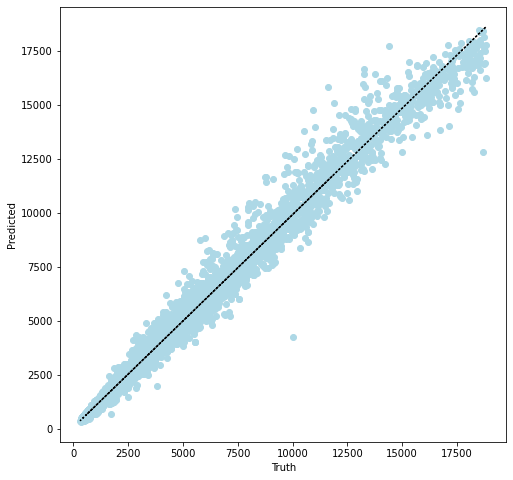

In [67]:
n,m=polyfit(y_test,y_pred_te2,1)
plt.figure(figsize=(8,8))
plt.scatter(x = y_test, y = y_pred_te2, c="lightblue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")
print(f'RMSE = {mean_squared_error(y_pred_te2, y_test)**0.5}')

In [68]:
y_pred_test_gb = gradient_boosting_model.predict(X_te)

In [69]:
data_test_df = pd.read_csv(data_test_path)
output = pd.DataFrame({'Id': data_test_df['Id'],
                       'Price': y_pred_test_gb})
output.to_csv('GB.csv', index=False)

### 2- Fine Tune parameter for Random Forest

**Note** all commented cell take long time to run so I save the result from it in below cell ⏰

The result : 

max_depth= 10,max_features= 'auto',max_leaf_nodes= 500,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 255



In [70]:
#random_forest_model = RandomForestRegressor()

In [71]:
#RFgridsearch=GridSearchCV(estimator=random_forest_model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)

In [72]:
#RFgridsearch.best_params_

'''
max_depth= 10,max_features= 'auto',max_leaf_nodes= 500,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 255

'''

"\nmax_depth= 10,max_features= 'auto',max_leaf_nodes= 500,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 255\n\n"

In [73]:
#RFgridsearch.best_score_

In [74]:
random_forest_model = RandomForestRegressor(max_depth= 10,max_features= 'auto',max_leaf_nodes= 500,
                                            min_samples_leaf= 2,min_samples_split= 2,n_estimators= 255)

In [75]:
random_forest_model.fit(X,y)

RandomForestRegressor(max_depth=10, max_leaf_nodes=500, min_samples_leaf=2,
                      n_estimators=255)

In [76]:
y_pred_test_rf1 = random_forest_model.predict(X_test)
mean_squared_error(y_pred_test_rf1, y_test)**0.5

505.03555634704503

RMSE = 505.03555634704503


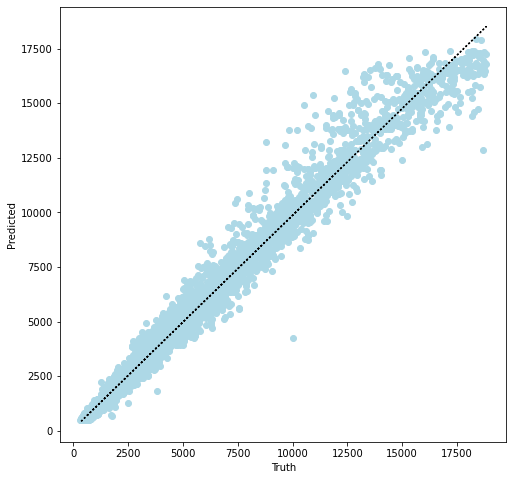

In [77]:
n,m=polyfit(y_test,y_pred_test_rf1,1)
plt.figure(figsize=(8,8))
plt.scatter(x = y_test, y = y_pred_test_rf1, c="lightblue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")
print(f'RMSE = {mean_squared_error(y_pred_test_rf1, y_test)**0.5}')

In [78]:
y_pred_test_rf = random_forest_model.predict(X_te)

In [79]:
data_test_df = pd.read_csv(data_test_path)
output = pd.DataFrame({'Id': data_test_df['Id'],
                       'Price': y_pred_test_rf})
output.to_csv('rf.csv', index=False)

## 6- Conclusion 

After preprossing data and train different models we find that Gradient Boosting is the best algorithm to gain less Error ( score = 521.18375)